<a href="https://colab.research.google.com/github/Saurabhnage/Cryptocurrency-BTC-Data-Analysis/blob/main/WebScraping_CryptoCurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# The List of 20 type of cryptocurrency
coin_list = ['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']

In [3]:
#defining the dataframe
main_df = pd.DataFrame()

In [4]:
for coin in coin_list:
    coin_df = pd.DataFrame()
    df = pd.DataFrame(index=[0])

    # Defining the Start Date and End Date
    datetime_end = datetime(2021, 7, 2, 0, 0)
    datetime_check = datetime(2021, 7, 1, 0, 0)

    while len(df) > 0:
        if datetime_end == datetime_check:
            break

        datetime_start = datetime_end - relativedelta(hours = 12)

        #Api for the scrapping
        url = 'https://production.api.coindesk.com/v2/price/values/'+ coin +'?start_date='+datetime_start.strftime("%Y-%m-%dT%H:%M") + '&end_date=' + datetime_end.strftime("%Y-%m-%dT%H:%M") + '&ohlc=true'

        #we are using the request to fetch the data from the api in the json format and then storing it into the dataframe.
        temp_data = requests.get(url).json()
        df = pd.DataFrame(temp_data['data']['entries'])
        df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close']

        # To handle the Missing Data
        insert_ids_list = [np.nan]

        '''In numerous occasions, I observed that CoinDesk did not collect every minute of data.
        According to observation, in a normal circumstance, the timestamp would have a discrepancy
        value of 60000 for 1 minute. As a result, I can quickly tell that the missing period is the
        time gap if the row difference for the timestamp is larger than 60000. To deal with it, a
        hot-deck imputation procedure is used. To put it another way, the nearest minute data will
        be substituted for the missing one.
        '''

        while len(insert_ids_list) > 0:
            timestamp_checking = np.array(df['Timestamp'][1:]) - np.array(df['Timestamp'][:-1])
            insert_ids_list = np.where(timestamp_checking!= 60000)[0]
            if len(insert_ids_list) > 0:
                print(str(len(insert_ids_list)) + ' mismatched.')
                insert_ids = insert_ids_list[0]
                temp_df = df.iloc[insert_ids.repeat(int(timestamp_checking[insert_ids]/60000)-1)].reset_index(drop=True)
                temp_df['Timestamp'] = [temp_df['Timestamp'][0] + i*60000 for i in range(1, len(temp_df)+1)]
                df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
                insert_ids_list = insert_ids_list[1:]


        #adding datetime and symbol to dataframe
        df = df.drop(['Timestamp'], axis=1)
        df['Datetime'] = [datetime_end - relativedelta(minutes=len(df)-i) for i in range(0, len(df))]
        coin_df = df.append(coin_df)
        datetime_end = datetime_start

    coin_df['Symbol'] = coin
    main_df = main_df.append(coin_df)


12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

12 mismatched.
11 mismatched.
10 mismatched.
9 mismatched.
8 mismatched.
7 mismatched.
6 mismatched.
5 mismatched.
4 mismatched.
3 mismatched.
2 mismatched.
1 mismatched.


<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
<ipython-input-4-541b4fe3d22a>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.loc[:insert_ids].append(temp_d

In [5]:
main_df = main_df[['Datetime', 'Symbol', 'Open', 'High', 'Low', 'Close']].reset_index(drop=True)
main_df

,Datetime,Symbol,Open,High,Low,Close
0,2021-06-30 23:59:00,BTC,35049.045484,35056.817222,34728.659011,34771.489908
1,2021-07-01 00:00:00,BTC,35049.045484,35056.817222,34728.659011,34771.489908
2,2021-07-01 00:01:00,BTC,35049.045484,35056.817222,34728.659011,34771.489908
3,2021-07-01 00:02:00,BTC,35049.045484,35056.817222,34728.659011,34771.489908
4,2021-07-01 00:03:00,BTC,35049.045484,35056.817222,34728.659011,34771.489908
...,...,...,...,...,...,...
27393,2021-07-01 23:55:00,EOS,3.970707,3.977964,3.925314,3.925648
27394,2021-07-01 23:56:00,EOS,3.970707,3.977964,3.925314,3.925648
27395,2021-07-01 23:57:00,EOS,3.970707,3.977964,3.925314,3.925648
27396,2021-07-01 23:58:00,EOS,3.970707,3.977964,3.925314,3.925648


from matplotlib import pyplot as plt
main_df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
main_df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
main_df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
main_df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
main_df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

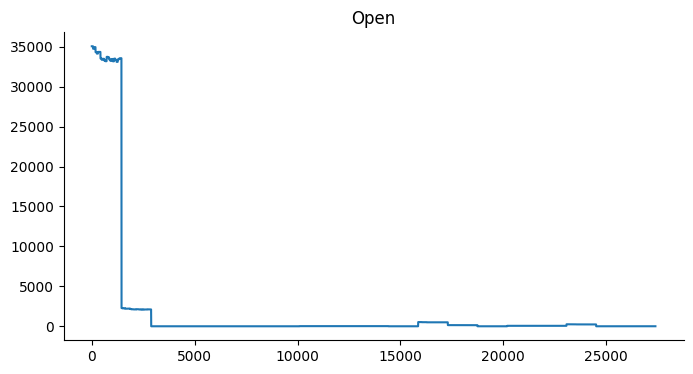

In [10]:
from matplotlib import pyplot as plt
main_df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

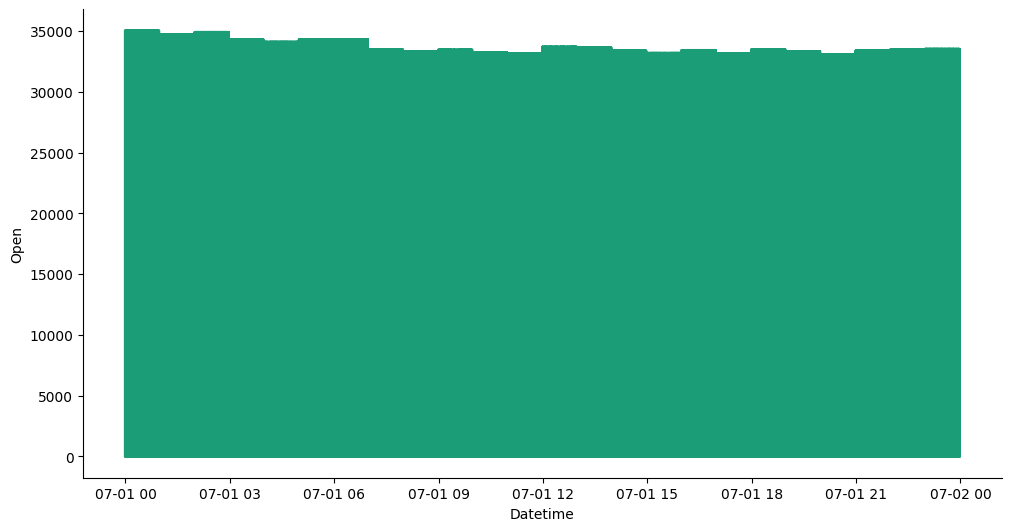

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = main_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Open')

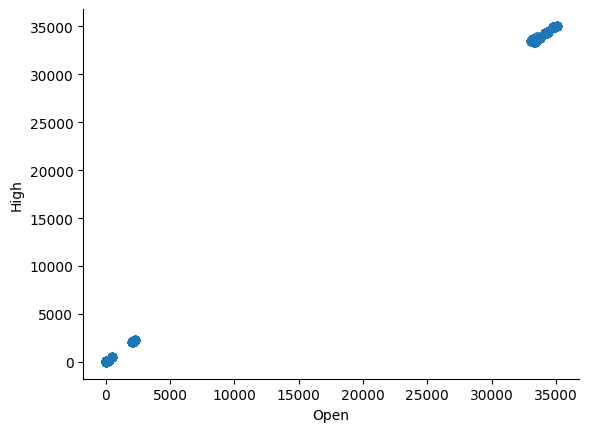

In [8]:
from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

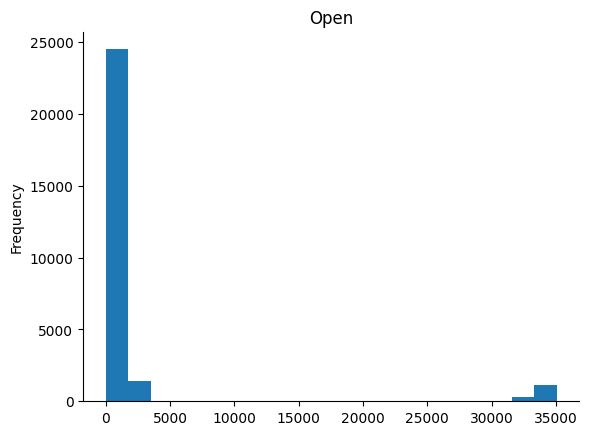

In [7]:
from matplotlib import pyplot as plt
main_df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
main_df.to_csv('main_df.csv', index=False)

In [13]:
#importing libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")

#for bold
start='\033[1m'
end='\033[0;0m'